In [1]:
import os
import warnings
from tqdm import tqdm

import PIL
import cv2
import pandas as pd
from processing import *
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

Let's check images amount

In [2]:
images_amount = check_images_amount()
print(images_amount)

{'test': 1436, 'train': 3802}


Let's load annotation file and look at the distribution graph of target labels

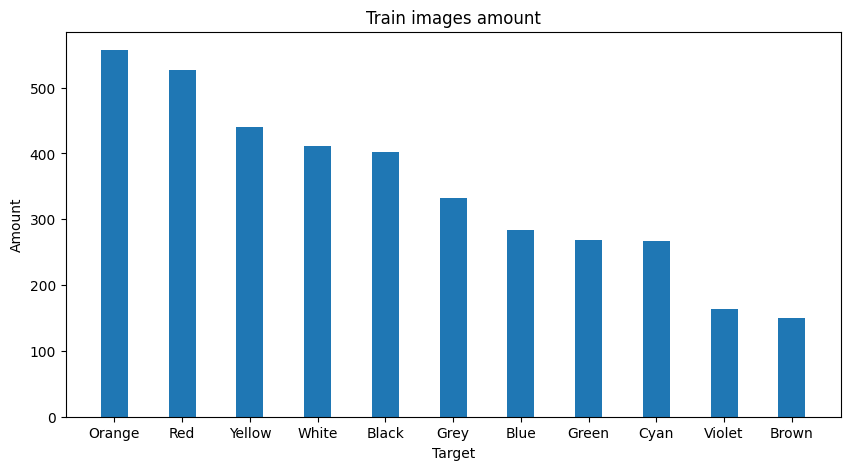

In [5]:
annotations = pd.read_csv("annotation_file.csv")
inverse_target_mapping = {path_idx: path for path_idx, path in enumerate(os.listdir("train"))}

fig = plt.figure(figsize = (10, 5))
visualize_distribution(annotations, inverse_target_mapping)
plt.xlabel("Target")
plt.ylabel("Amount")
plt.title("Train images amount")
plt.show()

<font color='red'>It's possible to add new car images to equalize distribution of target values</font>

Let's estimate of minimal dimension of image

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:10<00:00,  1.04it/s]

[min height]: 162 
[min width]: 184


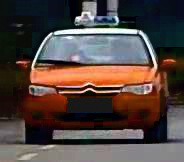

In [6]:
min_width, min_height, min_shapes_img = 9999, 9999, ""
for path in tqdm(os.listdir("train")):
    for img_name in os.listdir("train" + '//' + path):
        temp_img = cv2.imread("train" + '//' + path + '//' + img_name)
        if((temp_img.shape[0] < min_height) and (temp_img.shape[1] < min_width)):
            min_height = temp_img.shape[0]
            min_width = temp_img.shape[1]
            min_shapes_img = "train" + '//' + path + '//' + img_name
print(f"[min height]: {min_height} \n[min width]: {min_width}")
PIL.Image.open(min_shapes_img)

---